In [1]:
### Data Analysis packages
import numpy as np
import pandas as pd
import re
import warnings

### Data Visualization packages
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

from scipy.stats import pointbiserialr, chi2_contingency

### sklearn preprocessing tools
# from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from category_encoders import CountEncoder
from sklearn.preprocessing import OneHotEncoder, RobustScaler

from sklearn.model_selection import train_test_split

### SMOTE for oversampling
from imblearn.over_sampling import SMOTE

### Machine learning classification Model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [2]:
## Initial settings
matplotlib.rcParams["font.size"] = 10
matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.facecolor"] = '#00000000'

sns.set_style("darkgrid")
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )
sns.set_theme(color_codes=True)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

warnings.filterwarnings('ignore')

In [3]:
# Define the paths to the dataset and data dictionary files
dataset_path = 'data\Dataset.csv'
data_dict_path = 'data\Data_Dictionary.csv'

# Read the CSV files into pandas DataFrames
df_raw = pd.read_csv(dataset_path)
df_info= pd.read_csv(data_dict_path)

In [94]:
# final_cols = ['Client_Income',
# 'Car_Owned',
# 'Active_Loan',
# 'Credit_Amount',
# 'Loan_Annuity',
# 'Client_Income_Type',
# 'Client_Education',
# 'Client_Marital_Status',
# 'Client_Gender',
# 'Loan_Contract_Type',
# 'Client_Housing_Type',
# 'Population_Region_Relative',
# 'Age_Days',
# 'Employed_Days',
# 'Registration_Days',
# 'ID_Days',
# 'Homephone_Tag',
# 'Workphone_Working',
# 'Client_Occupation',
# 'Cleint_City_Rating',
# 'Client_Permanent_Match_Tag',
# 'Client_Contact_Work_Tag',
# 'Type_Organization',
# 'Score_Source_2',
# 'Score_Source_3',
# 'Phone_Change']

# len(final_cols)


# df_raw[final_cols + ['Default']].sample(5)


# for col in df_raw[final_cols + ['Default']].select_dtypes(include=['object']).columns.tolist():
#     print(col, len(df_raw[col].dropna().unique()), '\n', df_raw[col].unique(), '\n\n')

In [6]:
df_info

,Variable,Description
0,ID,Client Loan application ID
1,Client_Income,Client Income in $
2,Car_Owned,Any Car owned by client before applying for the loan for another car (0 means No and 1 means otherwise)
3,Bike_Owned,Any bike owned by client (0 means No and 1 means otherwise)
4,Active_Loan,Any other active loan at the time of aplication of loan (0 means No and 1 means otherwise)
5,House_Own,Any house owned by client (0 means No and 1 means otherwise)
6,Child_Count,Number of children the client has
7,Credit_Amount,Credit amount of the loan in $
8,Loan_Annuity,Loan annuity in $
9,Accompany_Client,Who accompanied the client when client applied for the loan


In [7]:
df_raw.shape

(121856, 40)

In [8]:
df_raw.duplicated().sum()

0

<Axes: >

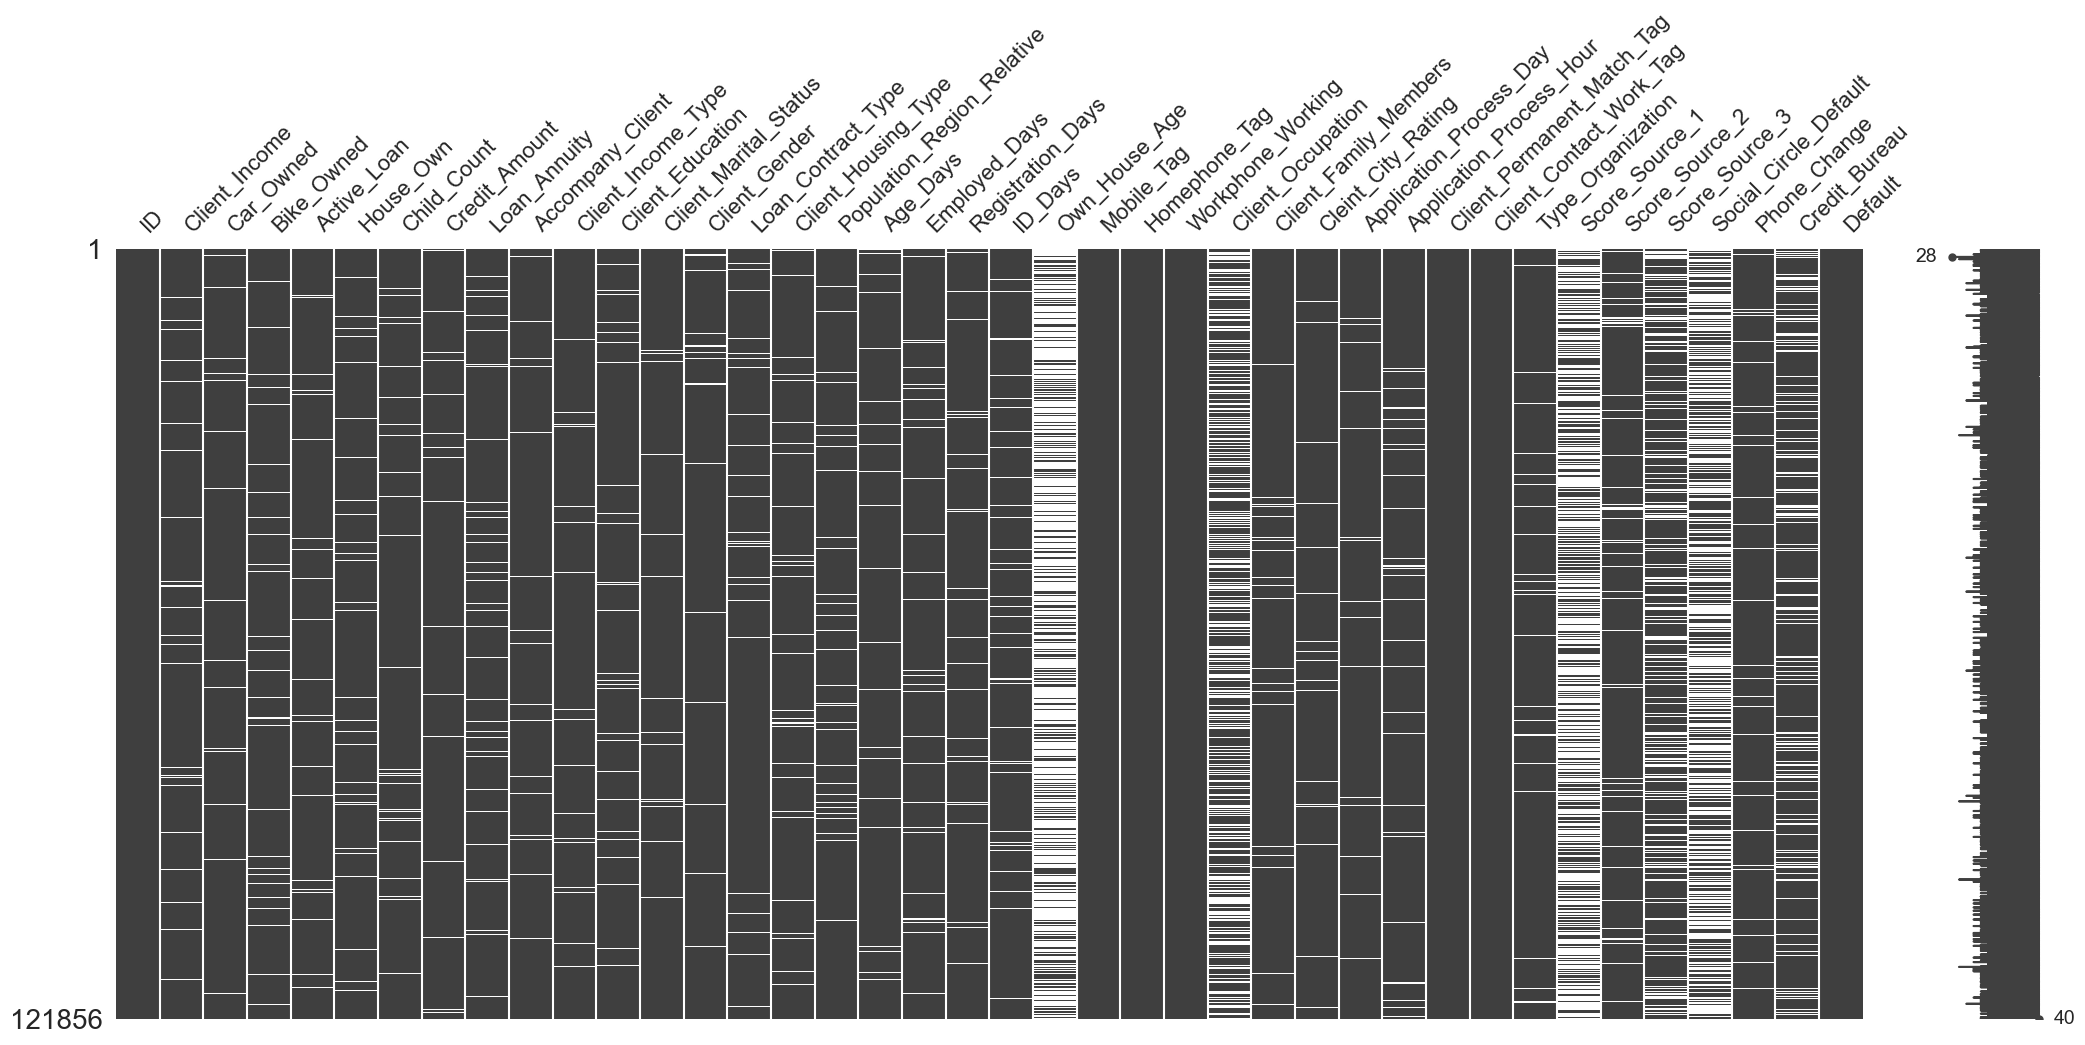

In [9]:
##Visualize missing values (NaN) values using Missingno Library
msno.matrix(df_raw)

In [10]:
## Percentage of Null values
null_df = (df_raw.isnull().sum()).sort_values(ascending=False).to_frame()
null_df.columns = ["No of Null values"]
null_df["% of Null values"] = round(null_df["No of Null values"]/len(df_raw)*100, 2)
null_df[null_df["No of Null values"] > 0]

,No of Null values,% of Null values
Own_House_Age,80095,65.73
Score_Source_1,68835,56.49
Social_Circle_Default,61928,50.82
Client_Occupation,41435,34.00
Score_Source_3,26921,22.09
Credit_Bureau,18540,15.21
ID_Days,5968,4.90
Score_Source_2,5686,4.67
Population_Region_Relative,4857,3.99
Loan_Annuity,4812,3.95


- Almost all the variables except ID, some client variables, phone variables and default have missing values

In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

#### Analysis of Target Variable `Default`

In [12]:
df_raw["Default"].value_counts()

Default
0    112011
1      9845
Name: count, dtype: int64

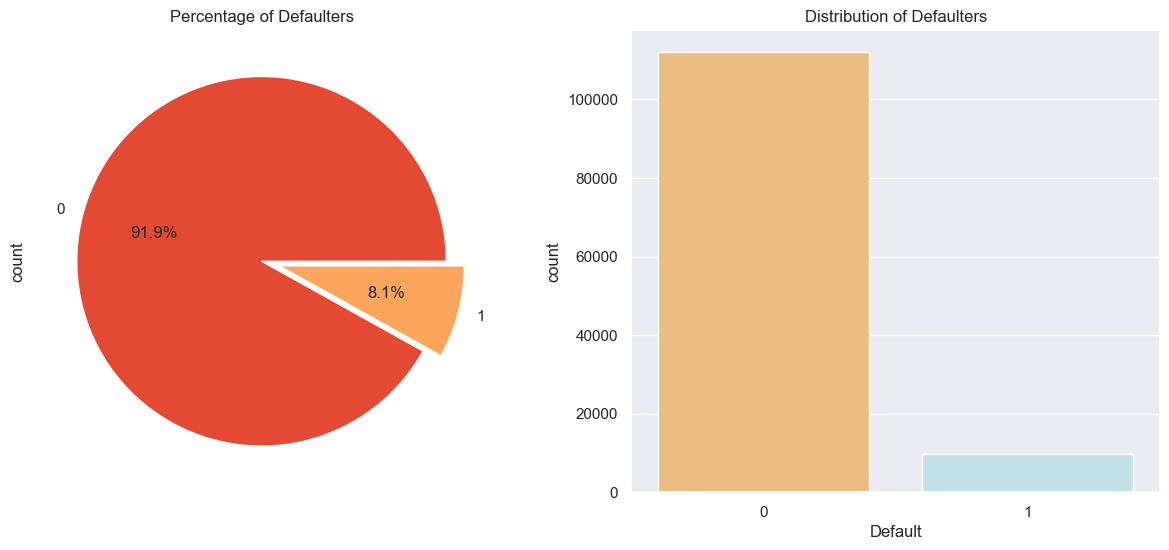

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
df_raw['Default'].value_counts().plot.pie(explode=[0,0.1],colors = sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title('Percentage of Defaulters')
sns.countplot(x='Default',data=df_raw,ax=ax2,palette='RdYlBu')
ax2.set_title('Distribution of Defaulters')
plt.show();

- The **dataset** is highly **imbalanced**

#### Basic details of all columns

In [14]:
def display_unique_values(df):
    for i, column in enumerate(df.columns):
        unique_values = df[column].unique()
        num_unique = len(unique_values)
        
        if num_unique > 10:
            unique_display = list(unique_values[:4]) + ['...'] + list(unique_values[-4:])
        else:
            unique_display = list(unique_values)

        print(f"{i}.  {column}")
        print(f"--> {df[column].dtypes}")
        print(f"--> {num_unique}")
        print(f"--> {unique_display}")
        print("\n")


print(f"Column Name, Total Unique Values and Unique Values of the respective column.\n")
display_unique_values(df_raw)

Column Name, Total Unique Values and Unique Values of the respective column.

0.  ID
--> int64
--> 121856
--> [12142509, 12138936, 12181264, 12188929, '...', 12173765, 12103937, 12170623, 12105610]


1.  Client_Income
--> object
--> 1517
--> ['6750', '20250', '18000', '15750', '...', '23557.5', '13140', '9764.1', '12840.75']


2.  Car_Owned
--> float64
--> 3
--> [0.0, 1.0, nan]


3.  Bike_Owned
--> float64
--> 3
--> [0.0, 1.0, nan]


4.  Active_Loan
--> float64
--> 3
--> [1.0, 0.0, nan]


5.  House_Own
--> float64
--> 3
--> [0.0, nan, 1.0]


6.  Child_Count
--> float64
--> 15
--> [0.0, 1.0, 2.0, nan, '...', 19.0, 12.0, 14.0, 9.0]


7.  Credit_Amount
--> object
--> 6817
--> ['61190.55', '15282', '59527.35', '53870.4', '...', '38522.25', '89138.7', '88885.8', '135534.6']


8.  Loan_Annuity
--> object
--> 16681
--> ['3416.85', '1826.55', '2788.2', '2295.45', '...', 3550.5, 1736.55, 3388.05, 2989.35]


9.  Accompany_Client
--> object
--> 8
--> ['Alone', 'Relative', 'Others', 'Kids', nan, '

- There are some **numeric columns** that are **represented as object columns**
- Presence of special characters is observed ('##' in `Accompany_Client` column)
- In the `Client_Gender` column, 'XNA' value can be replaced by mode value of the column

In [15]:
potential_numerical_columns = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Score_Source_3']

numeric_issues = {}

for col in potential_numerical_columns:
    try:
        df_raw[col].astype(float)
    except ValueError as e:
        numeric_issues[col] = str(e)

numeric_issues

{'Client_Income': "could not convert string to float: '$'",
 'Credit_Amount': "could not convert string to float: '$'",
 'Loan_Annuity': "could not convert string to float: '$'",
 'Population_Region_Relative': "could not convert string to float: '@'",
 'Age_Days': "could not convert string to float: 'x'",
 'Employed_Days': "could not convert string to float: 'x'",
 'Registration_Days': "could not convert string to float: 'x'",
 'ID_Days': "could not convert string to float: 'x'",
 'Score_Source_3': "could not convert string to float: '&'"}

- Presence of special characters and letters is observed in these columns

In [16]:
df_raw.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [17]:
potential_categorical_columns = ['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Default']

for col in potential_categorical_columns:
    print(f"Value counts for {col}:")
    print(df_raw[col].value_counts())
    print("\n")

Value counts for Car_Owned:
Car_Owned
0.0    77724
1.0    40551
Name: count, dtype: int64


Value counts for Bike_Owned:
Bike_Owned
0.0    78948
1.0    39284
Name: count, dtype: int64


Value counts for Active_Loan:
Active_Loan
0.0    59208
1.0    59013
Name: count, dtype: int64


Value counts for House_Own:
House_Own
1.0    81798
0.0    36397
Name: count, dtype: int64


Value counts for Mobile_Tag:
Mobile_Tag
1    121855
0         1
Name: count, dtype: int64


Value counts for Homephone_Tag:
Homephone_Tag
0    97424
1    24432
Name: count, dtype: int64


Value counts for Workphone_Working:
Workphone_Working
0    87590
1    34266
Name: count, dtype: int64


Value counts for Default:
Default
0    112011
1      9845
Name: count, dtype: int64




- All of the **potential_categorical_columns** can be considered as **categorical columns** (1 being Yes and 0 being No)
- The `Mobile_Tag` column can be dropped since it contains only one record with a value of 0, while the rest of the records have a value of 1

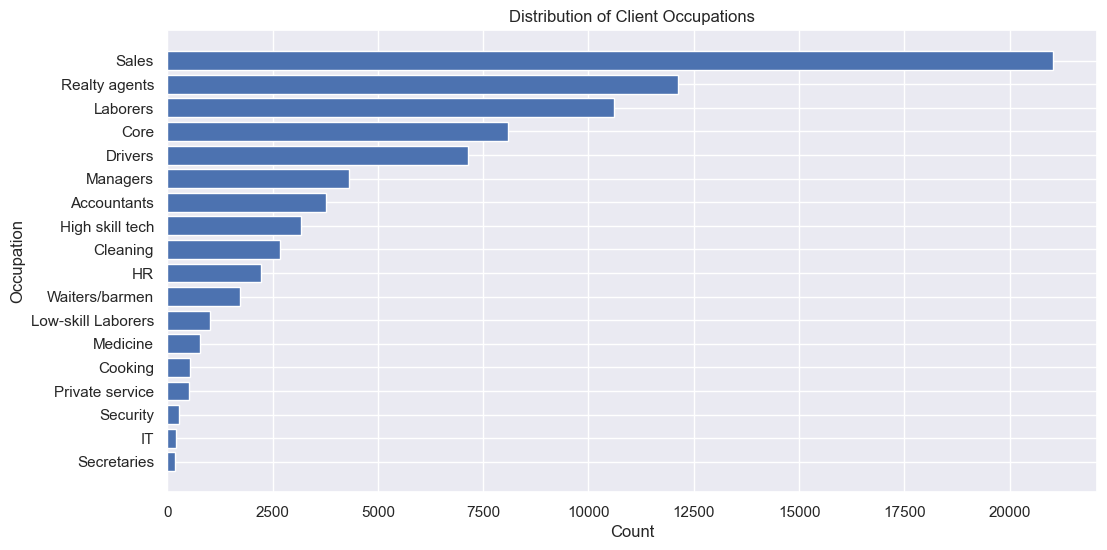

In [18]:
# Filter out missing values (NaN) in the 'Client_Occupation' column
temp_df = df_raw[df_raw['Client_Occupation'].notna()]

# Data
unique_occupations = temp_df['Client_Occupation'].unique()
occupation_counts = temp_df['Client_Occupation'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(unique_occupations, occupation_counts)
plt.gca().invert_yaxis()

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Distribution of Client Occupations')

plt.show()

- Since the `Client_Occupation` column contains many specific job titles, we can group different Client Occupations into more generalized occupation categories.

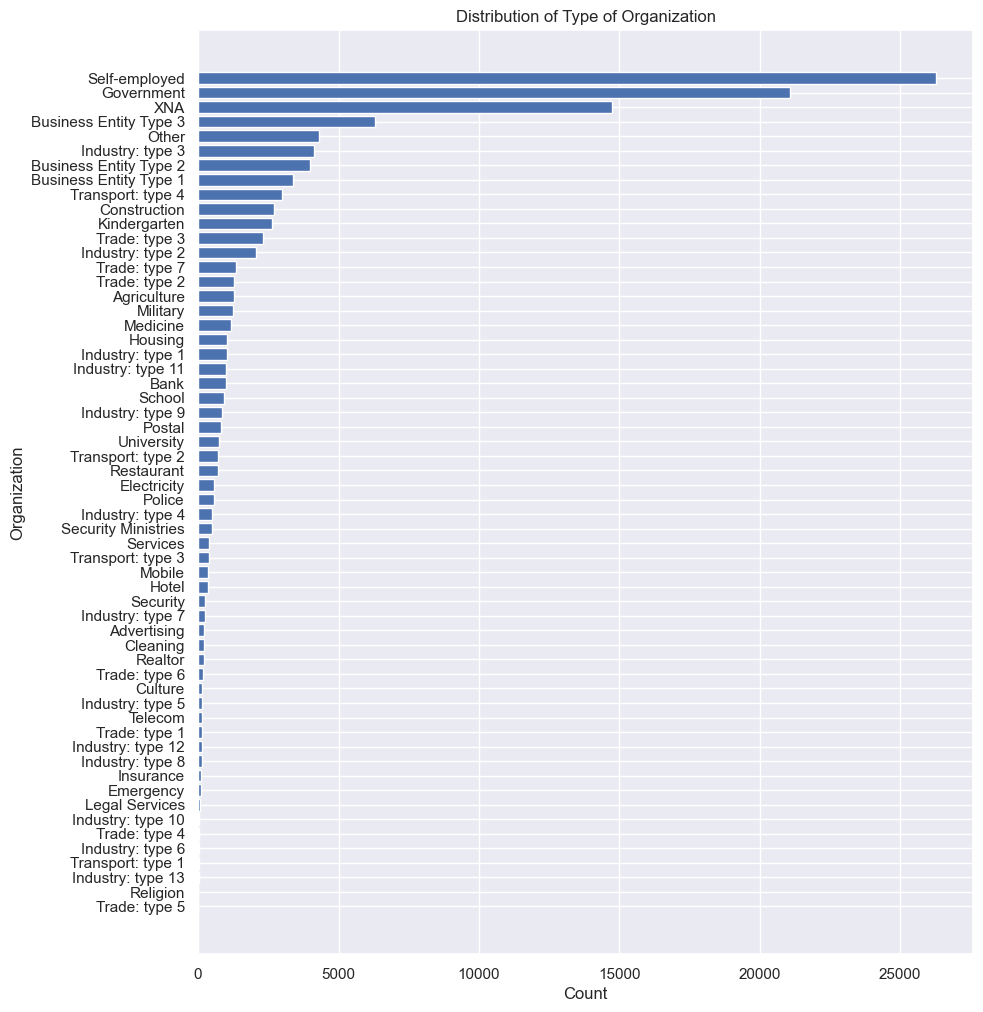

In [19]:
# Filter out missing values (NaN) in the 'Client_Occupation' column
temp_df = df_raw[df_raw['Type_Organization'].notna()]

# Data
unique_organizations = temp_df['Type_Organization'].unique()
organization_counts = temp_df['Type_Organization'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 12))
plt.barh(unique_organizations, organization_counts)
plt.gca().invert_yaxis()

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Organization')
plt.title('Distribution of Type of Organization')

plt.show()

- Since the `Type_Organization` column contains many specific organization types, we can create more generalized categories

## Data Preprocessing

In [20]:
df_raw = pd.read_csv(dataset_path)

In [21]:
df_raw.drop(columns = ['ID','Application_Process_Day','Application_Process_Hour'], inplace=True)

In [22]:
def replace_unwanted_chars(value):
    if isinstance(value, str):
        return re.sub(r'[$#@,]', '', value)
    return value

df_raw = df_raw.applymap(replace_unwanted_chars)

In [23]:
potential_numerical_columns = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Score_Source_3']

for column in potential_numerical_columns:
    df_raw[column] = pd.to_numeric(df_raw[column], errors='coerce')

In [24]:
potential_categorical_columns = ['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working']

for col in potential_categorical_columns:
    df_raw[col] = df_raw[col].replace({1: 'Yes', 0: 'No'})

In [25]:
df_raw['Client_Gender'].value_counts()

Client_Gender
Male      78463
Female    40977
XNA           3
Name: count, dtype: int64

- As there are just 3 records with 'XNA' value, we can impute them with the mode value

In [26]:
df_raw['Client_Gender'].replace('XNA', df_raw['Client_Gender'].mode().iloc[0], inplace=True)

In [27]:
df_raw['Mobile_Tag'].value_counts()

Mobile_Tag
Yes    121855
No          1
Name: count, dtype: int64

- The `Mobile_Tag` column can be dropped since it contains only one record with a value of 0, while the rest of the records have a value of 1

In [28]:
df_raw.drop(columns='Mobile_Tag', inplace=True)

In [29]:
df_raw['Accompany_Client'].value_counts()

Accompany_Client
Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
               12
Name: count, dtype: int64

- As there are just 12 records with '' (empty) value, we can impute them with the mode value

In [30]:
df_raw['Accompany_Client'].replace('', df_raw['Accompany_Client'].mode().iloc[0], inplace=True)

In [31]:
# # Define a function to map occupations to new categories
# def map_occupation(category):
#     if pd.isna(category):
#         return 'Unknown'
#     elif category in ['Sales', 'Realty agents', 'Managers', 'Accountants', 'High skill tech', 'IT']:
#         return 'Professional'
#     elif category in ['Laborers', 'Core', 'Drivers', 'Cleaning', 'Low-skill Laborers']:
#         return 'Skilled Labor'
#     elif category in ['HR', 'Waiters/barmen', 'Cooking', 'Private service', 'Security', 'Secretaries']:
#         return 'Service'
#     elif category == 'Medicine':
#         return 'Healthcare'
#     else:
#         return 'Other'


# df_raw['Client_Occupation'] = df_raw['Client_Occupation'].apply(map_occupation)

In [32]:
# # Define a function to map organization types to new categories
# def map_organization(category):
#     if pd.isna(category):
#         return 'Unknown'
#     elif category == 'XNA':
#         return 'Unknown'
#     elif category in ['Self-employed', 'Government']:
#         return 'Public Sector'
#     elif category in ['Business Entity Type 3', 'Business Entity Type 2', 'Business Entity Type 1', 'Construction']:
#         return 'Business'
#     elif category in ['Trade: type 3', 'Trade: type 7', 'Trade: type 2', 'Agriculture']:
#         return 'Trade'
#     elif category in ['Military', 'Medicine', 'Housing', 'Industry: type 1', 'Industry: type 11', 'Bank', 'School', 'Industry: type 9', 'Postal', 'University']:
#         return 'Institution'
#     elif category in ['Transport: type 4', 'Transport: type 2', 'Transport: type 3', 'Transport: type 1']:
#         return 'Transport'
#     else:
#         return 'Other'


# df_raw['Type_Organization'] = df_raw['Type_Organization'].apply(map_organization)

In [33]:
## Percentage of Null values
null_df = (df_raw.isnull().sum()).sort_values(ascending=False).to_frame()
null_df.columns = ["No of Null values"]
null_df["% of Null values"] = round(null_df["No of Null values"]/len(df_raw)*100, 2)
null_df[null_df["No of Null values"] > 0]

,No of Null values,% of Null values
Own_House_Age,80095,65.73
Score_Source_1,68835,56.49
Social_Circle_Default,61928,50.82
Client_Occupation,41435,34.00
Score_Source_3,26922,22.09
Credit_Bureau,18540,15.21
ID_Days,5985,4.91
Score_Source_2,5686,4.67
Population_Region_Relative,4868,3.99
Loan_Annuity,4826,3.96


In [34]:
percent_missing = (df_raw.isnull().sum() / len(df_raw)) * 100

columns_to_drop = percent_missing[percent_missing > 35].index

df_raw.drop(columns=columns_to_drop, inplace=True)

print("Columns with missing values greater than 35 percent have been dropped.")

df_raw.head()

Columns with missing values greater than 35 percent have been dropped.


,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,6750.0,No,No,Yes,No,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,383.0,Yes,No,Sales,2.0,2.0,Yes,Yes,Self-employed,0.478787,NaN,63.0,NaN,0
1,20250.0,Yes,No,Yes,NaN,0.0,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162.0,4129.0,7833.0,21.0,No,Yes,NaN,2.0,2.0,Yes,Yes,Government,0.215068,NaN,NaN,NaN,0
2,18000.0,No,No,Yes,No,1.0,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790.0,5102.0,NaN,331.0,No,No,Realty agents,2.0,2.0,Yes,Yes,Self-employed,0.552795,0.329655,277.0,0.0,0
3,15750.0,No,No,Yes,Yes,0.0,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195.0,365243.0,NaN,775.0,No,No,NaN,2.0,3.0,Yes,Yes,XNA,0.135182,0.631355,1700.0,3.0,0
4,33750.0,Yes,No,Yes,No,2.0,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366.0,2977.0,5516.0,4043.0,No,No,Laborers,4.0,1.0,Yes,Yes,Business Entity Type 3,0.301182,0.355639,674.0,1.0,0


In [35]:
numeric_cols = df_raw.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_raw.select_dtypes(include=['object']).columns.tolist()

In [36]:
histogram_numeric_cols = []

for col in numeric_cols:
    if len(df_raw[col].unique()) > 3:
        histogram_numeric_cols.append(col)

histogram_numeric_cols

['Client_Income',
 'Child_Count',
 'Credit_Amount',
 'Loan_Annuity',
 'Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days',
 'Client_Family_Members',
 'Cleint_City_Rating',
 'Score_Source_2',
 'Score_Source_3',
 'Phone_Change',
 'Credit_Bureau']

# Histograms

In [37]:
# def plot_histograms_and_boxplots(df, numeric_cols):
#     for col in numeric_cols:
#         fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
#         # Histogram
#         sns.histplot(df[col], kde=True, ax=axes[0])
#         axes[0].set_title(f'Histogram of {col}')
        
#         # Box plot
#         sns.boxplot(y=df[col], ax=axes[1])
#         axes[1].set_title(f'Box plot of {col}')
        
#         plt.show()

# plot_histograms_and_boxplots(df_raw, histogram_numeric_cols)

In [38]:
def handle_outliers(df):
    # Function to cap outliers based on IQR
    def cap_outliers(series, lower_bound, upper_bound):
        series = np.where(series > upper_bound, upper_bound, series)
        # series = np.where(series < lower_bound, lower_bound, series)
        return series

    # Population_Region_Relative: Outliers near 0 and 100
    Q1 = df['Population_Region_Relative'].quantile(0.25)
    Q3 = df['Population_Region_Relative'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df['Population_Region_Relative'] = cap_outliers(df['Population_Region_Relative'], lower_bound, upper_bound)

    # Employed_Days: Heavily right-tailed with impossible values
    Q1 = df['Employed_Days'].quantile(0.25)
    Q3 = df['Employed_Days'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    df = df[df['Employed_Days'] <= upper_bound]

    # Score_Source_2: Right-tailed with outliers near 100
    Q1 = df['Score_Source_2'].quantile(0.25)
    Q3 = df['Score_Source_2'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df['Score_Source_2'] = cap_outliers(df['Score_Source_2'], lower_bound, upper_bound)

    return df

df_raw = handle_outliers(df_raw)

In [39]:
# plot_histograms_and_boxplots(df_raw, histogram_numeric_cols)

- Some extreme values in numeric columns are retained, as they can be considered realistic representations of the data and not outliers

<Axes: >

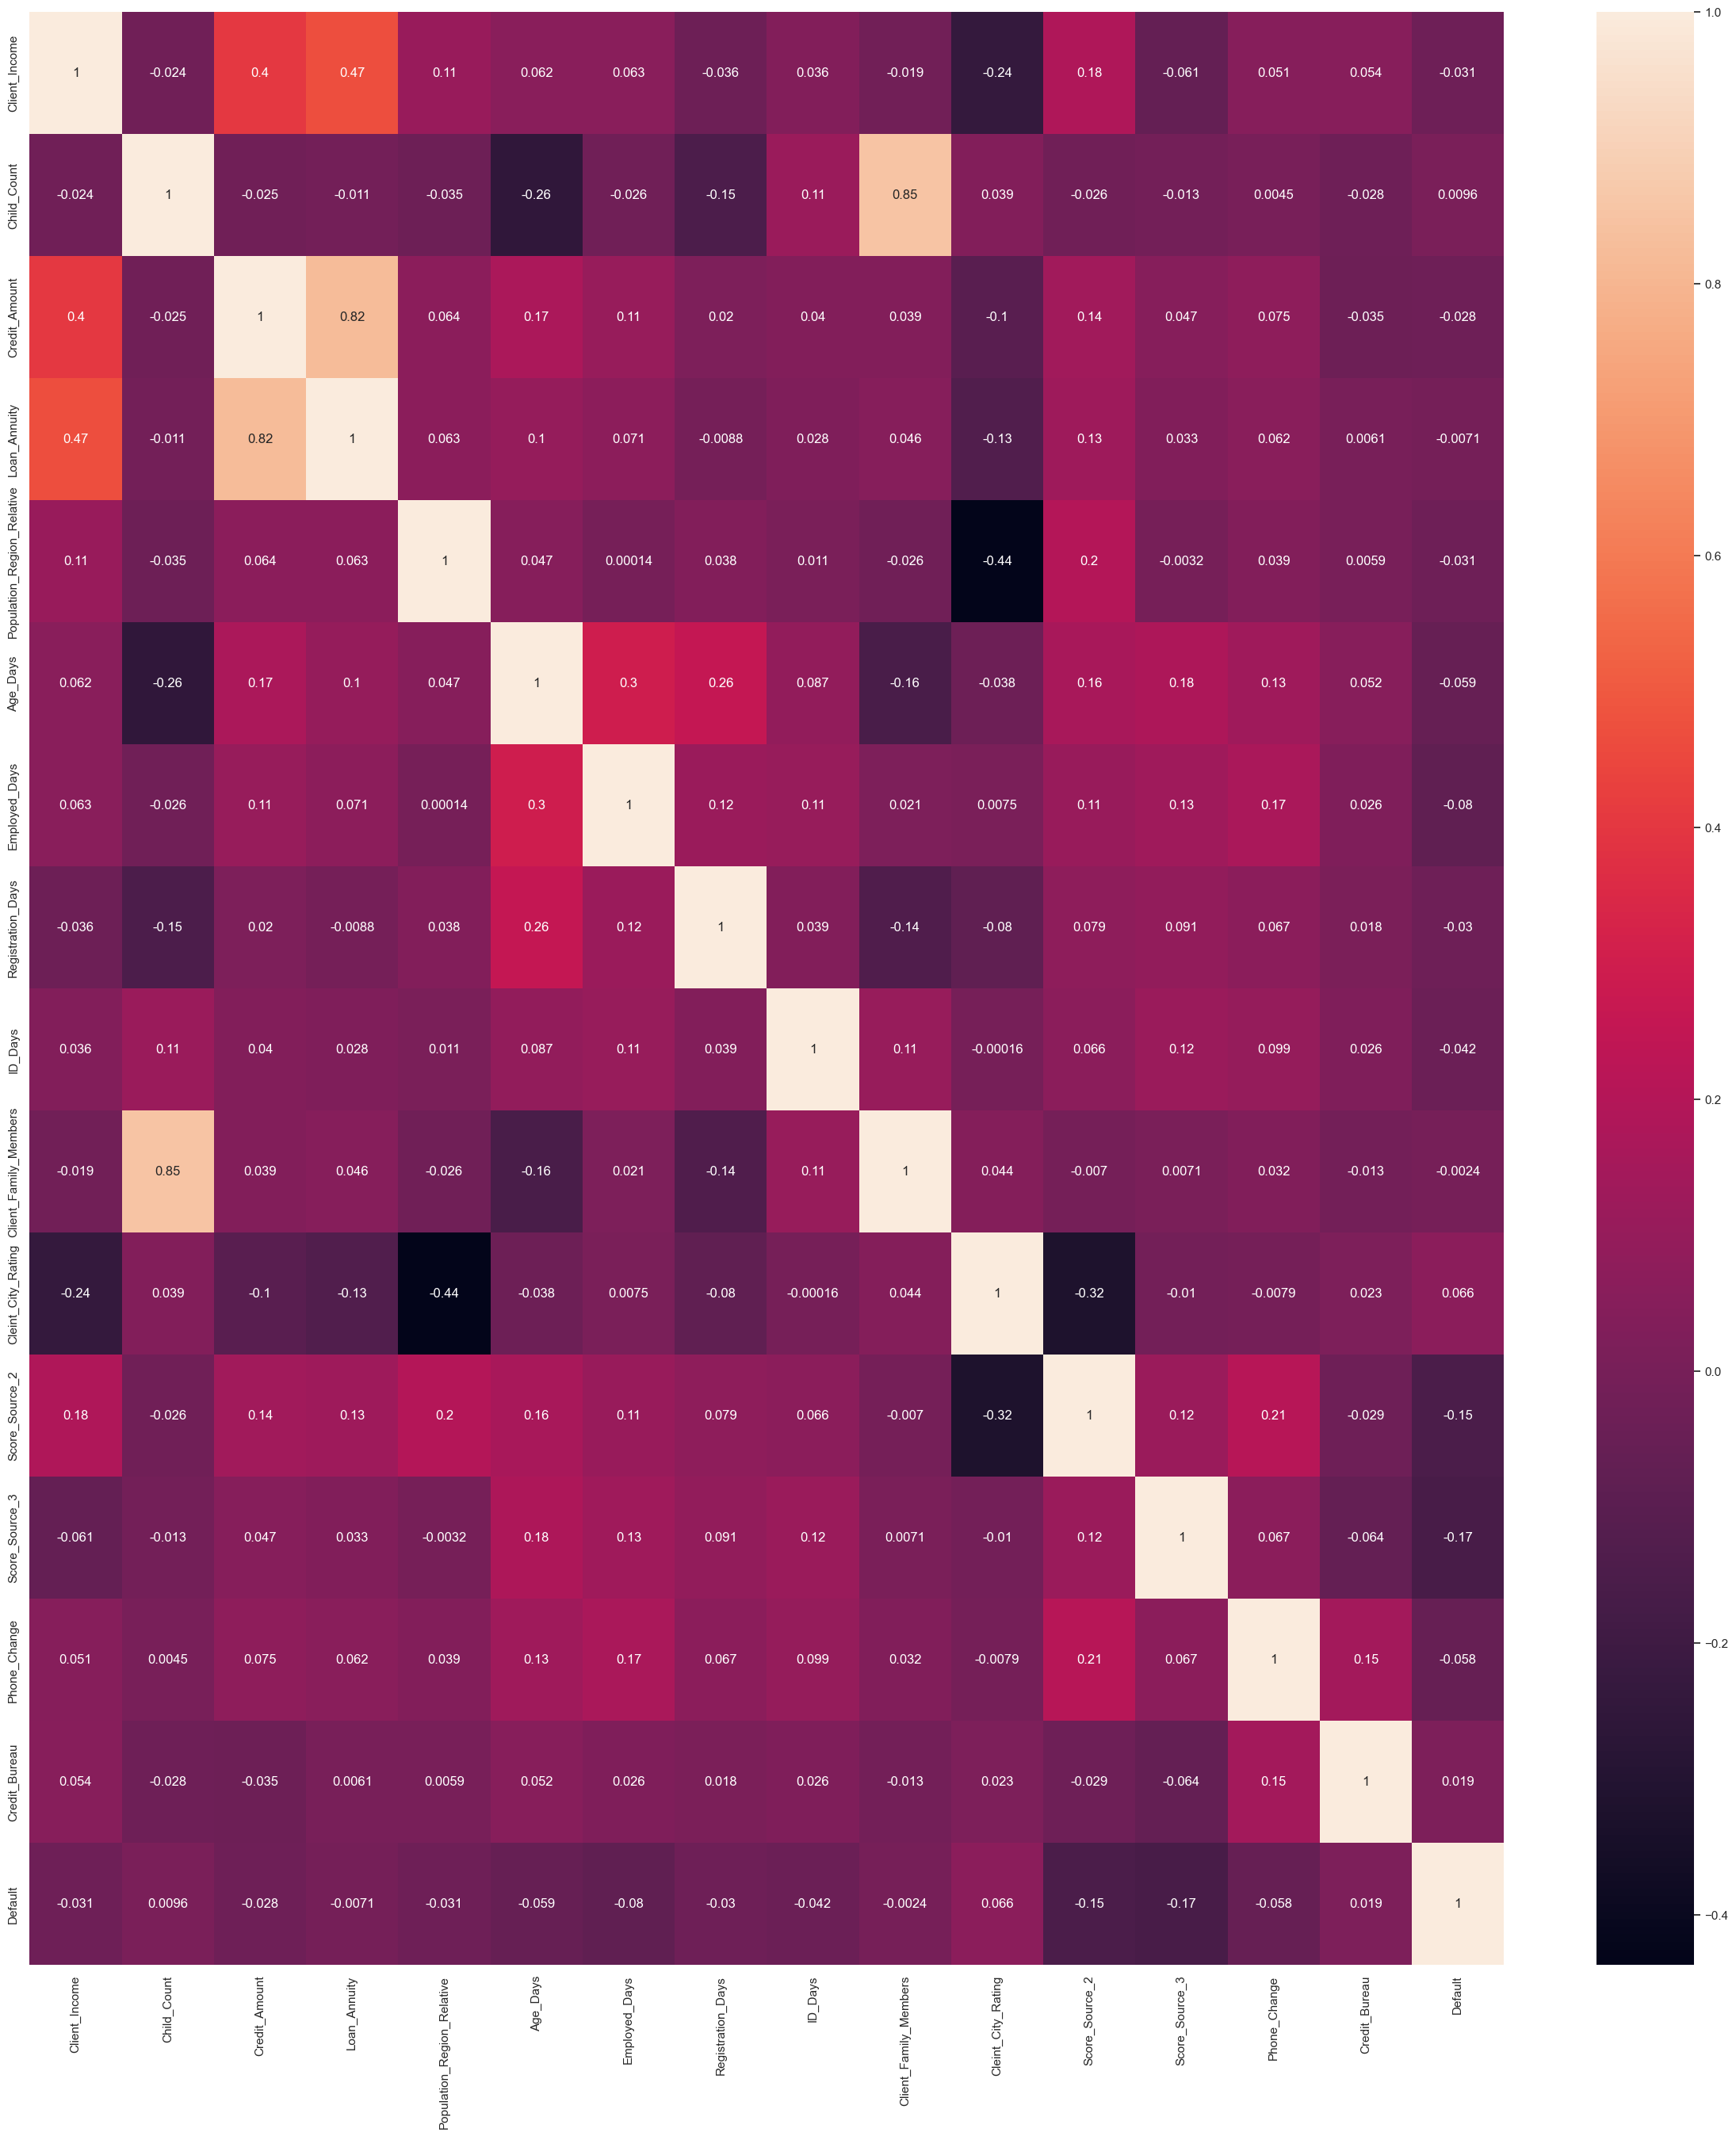

In [40]:
# Correlation Heatmap
plt.figure(figsize=(30, 32))
sns.heatmap(df_raw[df_raw.select_dtypes(include=['number']).columns.tolist()].corr(method='spearman'), fmt='.2g', annot=True)

- We will retain all columns that have a correlation of less than -0.03 and greater than +0.03

In [41]:
spearman_corr = df_raw[df_raw.select_dtypes(include=['number']).columns.tolist()].corr(method='spearman')
default_corr = spearman_corr['Default']


filtered_columns = default_corr[(default_corr < -0.025) | (default_corr > 0.025)].index.tolist()
if 'Default' in filtered_columns:
    filtered_columns.remove('Default')

filtered_columns

['Client_Income',
 'Credit_Amount',
 'Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days',
 'Cleint_City_Rating',
 'Score_Source_2',
 'Score_Source_3',
 'Phone_Change']

In [42]:
# # List to store the results
# correlation_results = []

# no_null_df = df_raw.select_dtypes(include=['number']).dropna()

# # Iterate through numeric columns and calculate point biserial correlation
# for col in df_raw.select_dtypes(include=['number']).columns:
#     if col != 'Default':
#         correlation, p_value = pointbiserialr(no_null_df['Default'], no_null_df[col])
#         correlation_results.append((col, correlation))

# # Convert the results to a DataFrame for better readability
# correlation_df = pd.DataFrame(correlation_results, columns=['Column', 'PointBiserialCorrelation'])


# correlation_df

In [43]:
# filtered_columns = correlation_df[(correlation_df['PointBiserialCorrelation'] < -0.03) | (correlation_df['PointBiserialCorrelation'] > 0.03)]['Column'].tolist()
# filtered_columns

In [44]:
columns_to_drop = []

for col in numeric_cols:
    if col not in filtered_columns and col != 'Default':
        columns_to_drop.append(col)

columns_to_drop

['Child_Count', 'Loan_Annuity', 'Client_Family_Members', 'Credit_Bureau']

- Based on domain knowledge, we will retain certain columns and drop others

In [45]:
columns_to_drop.remove('Loan_Annuity')
# columns_to_drop.extend(['Population_Region_Relative', 'Age_Days', 'Registration_Days', 'ID_Days', 'Cleint_City_Rating', 'Workphone_Working', 'Client_Contact_Work_Tag'])
columns_to_drop

['Child_Count', 'Client_Family_Members', 'Credit_Bureau']

In [46]:
df_raw.drop(columns=columns_to_drop, inplace=True)

In [47]:
numeric_cols = df_raw.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_raw.select_dtypes(include=['object']).columns.tolist()

len(numeric_cols), len(categorical_cols)

(13, 17)

In [48]:
def chi_square_test(df, target_col, categorical_cols):
    results = {}
    for column in categorical_cols:
        contingency_table = pd.crosstab(df[column], df[target_col])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        results[column] = p
    return results

# Perform Chi-Square test
results = chi_square_test(df_raw[categorical_cols + ['Default']].dropna(), 'Default', categorical_cols)

# Display results
for column, p_value in results.items():
    print(f"Column: {column}, p-value: {p_value}")

Column: Car_Owned, p-value: 2.758627085029471e-18
Column: Bike_Owned, p-value: 0.5448858950415153
Column: Active_Loan, p-value: 0.14120892547219865
Column: House_Own, p-value: 0.28120256754075534
Column: Accompany_Client, p-value: 0.12396745331134446
Column: Client_Income_Type, p-value: 1.063424378645384e-21
Column: Client_Education, p-value: 2.633363143529396e-69
Column: Client_Marital_Status, p-value: 3.84730040432347e-11
Column: Client_Gender, p-value: 3.132520447537279e-26
Column: Loan_Contract_Type, p-value: 3.9215806994969532e-16
Column: Client_Housing_Type, p-value: 1.325025787002459e-13
Column: Homephone_Tag, p-value: 0.009158659730950706
Column: Workphone_Working, p-value: 2.8102465181727082e-08
Column: Client_Occupation, p-value: 9.762036260347356e-74
Column: Client_Permanent_Match_Tag, p-value: 1.6644550859032045e-24
Column: Client_Contact_Work_Tag, p-value: 7.382799760982923e-06
Column: Type_Organization, p-value: 3.4773418132509115e-33


In [49]:
filtered_columns = [col for col, pval in results.items() if pval < 0.05]
filtered_columns

['Car_Owned',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Homephone_Tag',
 'Workphone_Working',
 'Client_Occupation',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag',
 'Type_Organization']

In [50]:
columns_to_drop = []

for col in categorical_cols:
    if col not in filtered_columns:
        columns_to_drop.append(col)

columns_to_drop

['Bike_Owned', 'Active_Loan', 'House_Own', 'Accompany_Client']

- Based on domain knowledge, we will retain certain columns and drop others

In [51]:
columns_to_drop.remove('Active_Loan')
# columns_to_drop.extend(['Client_Marital_Status', 'Client_Gender', 'Homephone_Tag', 'Client_Permanent_Match_Tag', 'Car_Owned'])
columns_to_drop

['Bike_Owned', 'House_Own', 'Accompany_Client']

In [52]:
df_raw.drop(columns=columns_to_drop, inplace=True)

In [53]:
df_raw

,Client_Income,Car_Owned,Active_Loan,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Homephone_Tag,Workphone_Working,Client_Occupation,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Default
0,6750.0,No,Yes,61190.55,3416.85,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,383.0,Yes,No,Sales,2.0,Yes,Yes,Self-employed,0.478787,NaN,63.0,0
1,20250.0,Yes,Yes,15282.00,1826.55,Service,Graduation,M,Male,CL,Home,0.008575,14162.0,4129.0,7833.0,21.0,No,Yes,NaN,2.0,Yes,Yes,Government,0.215068,NaN,NaN,0
2,18000.0,No,Yes,59527.35,2788.20,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790.0,5102.0,NaN,331.0,No,No,Realty agents,2.0,Yes,Yes,Self-employed,0.552795,0.329655,277.0,0
4,33750.0,Yes,Yes,133988.40,3547.35,Commercial,Secondary,M,Female,CL,Home,0.020713,11366.0,2977.0,5516.0,4043.0,No,No,Laborers,1.0,Yes,Yes,Business Entity Type 3,0.301182,0.355639,674.0,0
5,11250.0,No,Yes,13752.00,653.85,Service,Secondary,W,Female,CL,Home,0.019101,13881.0,1184.0,3910.0,3910.0,No,No,Laborers,2.0,Yes,Yes,Other,0.697928,0.420611,739.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,29250.0,No,NaN,107820.00,3165.30,Service,Secondary,M,Female,CL,Home,0.031329,12889.0,2863.0,2661.0,2943.0,No,No,Laborers,2.0,Yes,No,Business Entity Type 2,0.173527,0.184116,0.0,1
121852,15750.0,No,Yes,104256.00,3388.05,Commercial,Graduation,M,Female,CL,Home,0.018209,8648.0,636.0,902.0,1209.0,Yes,No,Sales,3.0,Yes,Yes,Self-employed,0.371559,0.406617,4.0,0
121853,8100.0,No,No,55107.90,2989.35,Govt Job,Secondary,M,Male,CL,Home,0.008068,9152.0,1623.0,3980.0,353.0,No,No,High skill tech,3.0,No,No,Trade: type 6,0.048079,NaN,0.0,0
121854,38250.0,Yes,No,45000.00,2719.35,Service,Graduation,M,Female,CL,Home,0.028663,10290.0,847.0,895.0,2902.0,No,No,Sales,2.0,Yes,Yes,Business Entity Type 3,0.103538,0.077499,0.0,0


In [54]:
numeric_cols = df_raw.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_raw.select_dtypes(include=['object']).columns.tolist()

len(numeric_cols), len(categorical_cols)

(13, 14)

# Train Test Split

In [55]:
X = df_raw.drop('Default', axis=1)
y = df_raw['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((77361, 26), (19341, 26), (77361,), (19341,))

In [57]:
# median_imputing_cols = ['Client_Income',
#                         'Credit_Amount',
#                         'Loan_Annuity',
#                         'Population_Region_Relative',
#                         'Age_Days',
#                         'Employed_Days',
#                         'Registration_Days',
#                         'ID_Days',
#                         'Score_Source_2',
#                         'Score_Source_3',
#                         'Phone_Change']

# len(median_imputing_cols), median_imputing_cols

In [58]:
# mode_imputation_cols = []
# for col in X_train.columns:
#     if col not in median_imputing_cols:
#         mode_imputation_cols.append(col)

# len(mode_imputation_cols), mode_imputation_cols

In [59]:
# class OccupationMapper(BaseEstimator, TransformerMixin):
#     def __init__(self, column):
#         self.column = column

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         X = X.copy()
#         X[self.column] = X[self.column].apply(self.map_occupation)
#         return X

#     def map_occupation(self, category):
#         if pd.isna(category):
#             return 'Unknown'
#         elif category in ['Sales', 'Realty agents', 'Managers', 'Accountants', 'High skill tech', 'IT']:
#             return 'Professional'
#         elif category in ['Laborers', 'Core', 'Drivers', 'Cleaning', 'Low-skill Laborers']:
#             return 'Skilled Labor'
#         elif category in ['HR', 'Waiters/barmen', 'Cooking', 'Private service', 'Security', 'Secretaries']:
#             return 'Service'
#         elif category == 'Medicine':
#             return 'Healthcare'
#         else:
#             return 'Other'

In [60]:
# class OrganizationMapper(BaseEstimator, TransformerMixin):
#     def __init__(self, column):
#         self.column = column

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         X = X.copy()
#         X[self.column] = X[self.column].apply(self.map_organization)
#         return X

#     def map_organization(self, category):
#         if pd.isna(category):
#             return 'Unknown'
#         elif category == 'XNA':
#             return 'Unknown'
#         elif category in ['Self-employed', 'Government']:
#             return 'Public Sector'
#         elif category in ['Business Entity Type 3', 'Business Entity Type 2', 'Business Entity Type 1', 'Construction']:
#             return 'Business'
#         elif category in ['Trade: type 3', 'Trade: type 7', 'Trade: type 2', 'Agriculture']:
#             return 'Trade'
#         elif category in ['Military', 'Medicine', 'Housing', 'Industry: type 1', 'Industry: type 11', 'Bank', 'School', 'Industry: type 9', 'Postal', 'University']:
#             return 'Institution'
#         elif category in ['Transport: type 4', 'Transport: type 2', 'Transport: type 3', 'Transport: type 1']:
#             return 'Transport'
#         else:
#             return 'Other'

In [61]:
# occupation_pipeline = Pipeline([
#     ('occupation_mapper', OccupationMapper(column='Client_Occupation'))
# ])

# X_train = occupation_pipeline.fit_transform(X_train)
# X_test = occupation_pipeline.transform(X_test)


# organization_pipeline = Pipeline([
#     ('organization_mapper', OrganizationMapper(column='Type_Organization'))
# ])

# X_train = organization_pipeline.fit_transform(X_train)
# X_test = organization_pipeline.transform(X_test)


# median_pipeline = Pipeline(
#     steps=[
#         ('imputer', SimpleImputer(strategy='median')),
# ])

# X_train[median_imputing_cols] = median_pipeline.fit_transform(X_train[median_imputing_cols])
# X_test[median_imputing_cols] = median_pipeline.transform(X_test[median_imputing_cols])


# mode_pipeline = Pipeline(
#     steps=[
#         ('imputer', SimpleImputer(strategy='most_frequent')),
# ])

# X_train[mode_imputation_cols] = mode_pipeline.fit_transform(X_train[mode_imputation_cols])
# X_test[mode_imputation_cols] = mode_pipeline.transform(X_test[mode_imputation_cols])


# num_encoding_pipeline = Pipeline(
#     steps=[
#         ('StandardScaler', StandardScaler())
# ])

# X_train[median_imputing_cols] = num_encoding_pipeline.fit_transform(X_train[median_imputing_cols])
# X_test[median_imputing_cols] = num_encoding_pipeline.transform(X_test[median_imputing_cols])


# # cat_encoding_pipeline = Pipeline([
# #     ('LabelEncoder', LabelEncoder())
# # ])

In [62]:
# label_enc_cols = ['Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Client_Occupation', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization']

# for col in categorical_cols:
#     if col not in label_enc_cols:
#         X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
#         X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# label_encoders = {column: LabelEncoder() for column in label_enc_cols}

# for column in label_enc_cols:
#     X_train[column] = label_encoders[column].fit_transform(X_train[column])
#     X_test[column] = label_encoders[column].transform(X_test[column])

In [63]:
# num_cols = ['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count', 'Homephone_Tag', 'Workphone_Working', 'Client_Family_Members', 'Cleint_City_Rating', 'Credit_Bureau']
# for column in num_cols:
#     X_train[column] = pd.to_numeric(X_train[column], errors='coerce')
#     X_test[column] = pd.to_numeric(X_test[column], errors='coerce')

In [64]:
# median_imputing_cols = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 'Age_Days', 'Employed_Days',
#                         'Registration_Days', 'ID_Days', 'Score_Source_2', 'Score_Source_3', 'Phone_Change']

# mode_imputation_cols = [col for col in X_train.columns if col not in median_imputing_cols]

# encoding_cols = ['Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
#                   'Client_Gender','Loan_Contract_Type', 'Client_Housing_Type', 'Client_Occupation',
#                   'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization']


# median_pipeline = Pipeline(
#     steps=[
#         ('imputer', SimpleImputer(strategy='median')),
#         ('scaler', StandardScaler())
# ])

# mode_pipeline = Pipeline(
#     steps=[
#         ('imputer', SimpleImputer(strategy='most_frequent')),
#         ('passthrough', 'passthrough')
# ])


# encoding_pipeline = Pipeline(
#     steps=[
#         ('encoder', OrdinalEncoder())
#     ]
# )

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('median_pipeline', median_pipeline, median_imputing_cols),
#         ('mode_pipeline', mode_pipeline, mode_imputation_cols),
#         # ('encoding_pipeline', encoding_pipeline, encoding_cols)
# ])

# X_train_transformed = preprocessor.fit_transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)

#### CatBoost

In [65]:
# X = df_raw.drop('Default', axis=1)
# y = df_raw['Default']

# X_train, X_test, y_train, y_test = train_test_split(X[categorical_cols], y, test_size=0.20, stratify=y, random_state=42)


# numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
# categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# len(numeric_cols), len(categorical_cols)


# categorical_pipeline = Pipeline(
#     steps=[
#         ('imputer', SimpleImputer(strategy='most_frequent'))
# ])


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('categorical_pipeline', categorical_pipeline, categorical_cols)
# ])

# X_train_transformed = preprocessor.fit_transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)\

# X_train_transformed


# categorical_indices = [X_train.columns.get_loc(col) for col in categorical_cols]

# model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, cat_features=categorical_indices, verbose=100)

# model.fit(X_train_transformed, y_train)

# y_pred = model.predict(X_test_transformed)

# accuracy = accuracy_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred, average='macro')

# print(f'Accuracy: {accuracy}')
# print(f'Recall: {recall}')

#### CatBoost Ends

In [66]:
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

len(numeric_cols), len(categorical_cols)

(12, 14)

In [67]:
print(f"{len(numeric_cols)} {numeric_cols}\n\n{len(categorical_cols)} {categorical_cols}")

12 ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Cleint_City_Rating', 'Score_Source_2', 'Score_Source_3', 'Phone_Change']

14 ['Car_Owned', 'Active_Loan', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization']


In [68]:
count_enc_cols = []
one_hot_enc_cols = []

for col in categorical_cols:
    if len(X_train[col].value_counts()) > 2:
        count_enc_cols.append(col)
    else:
        one_hot_enc_cols.append(col)

In [69]:
len(count_enc_cols) + len(one_hot_enc_cols)

14

In [70]:
numeric_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
])


categorical_pipeline_1 = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('count_encoder', CountEncoder())
])


categorical_pipeline_2 = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('one_hot_encoder', OneHotEncoder())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_pipeline', numeric_pipeline, numeric_cols),
        ('categorical_pipeline_1', categorical_pipeline_1, count_enc_cols),
        ('categorical_pipeline_2', categorical_pipeline_2, one_hot_enc_cols)
])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [71]:
X_train_transformed.shape, X_test_transformed.shape

((77361, 34), (19341, 34))

In [72]:
y_train.value_counts()

Default
0    70646
1     6715
Name: count, dtype: int64

In [73]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_transformed, y_train)

In [74]:
X_train_smote.shape, y_train_smote.shape

((141292, 34), (141292,))

In [75]:
y_train_smote.value_counts()

Default
0    70646
1    70646
Name: count, dtype: int64

In [76]:
# Evaluate Model
def evaluate_model(true, predicted, predicted_probs):
    conf_matrix = confusion_matrix(true, predicted)
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1_scr = f1_score(true, predicted)
    ro_au_scr = roc_auc_score(true, predicted_probs)
    return conf_matrix, accuracy, precision, recall, f1_scr, ro_au_scr

models = {
    "Logistic Regression": LogisticRegression(n_jobs=6),
    "NaiveBayes Classifier": BernoulliNB(),
    "DecisionTree Classifier": DecisionTreeClassifier(max_depth=15),
    "RandomForest Classifier": RandomForestClassifier(n_jobs=6, max_depth=17),
    # "LGBM Classifier": LGBMClassifier(n_estimators=200, n_jobs=6, max_depth=15, num_leaves=1023),
    "LGBM Classifier": LGBMClassifier(n_estimators=200, n_jobs=6, max_depth=15),
    "XGB Classifier": XGBClassifier(n_estimators=200, n_jobs=6, max_depth=15),
}

model_list = []
recall_list = []

for i in range(len(list(models))):

    print(list(models.keys())[i])
    model = list(models.values())[i]
    model.fit(X_train_smote, y_train_smote) # Train model

    # Make predictions
    y_pred = model.predict(X_test_transformed)
    y_pred_probs = model.predict_proba(X_test_transformed)[:,1]

    # Evaluate Test dataset
    conf_matrix, accuracy, precision, recall, f1_scr, ro_au_scr = evaluate_model(y_test, y_pred, y_pred_probs)
    
    # Update Model list
    model_list.append(list(models.keys())[i])
    
    # Update Recall list
    recall_list.append(recall)

    # Display results
    print('Model performance for Test set')
    print("- Confusion Matrix:\n{}".format(conf_matrix))
    print("- Accuracy: {:.4f}".format(accuracy * 100.0))
    print("- Precision: {:.4f}".format(precision * 100.0))
    print("- Recall: {:.4f}".format(recall * 100.0))
    print("- F1-Score: {:.4f}".format(f1_scr * 100.0))
    print("- ROC AUC Score : {:.4f}".format(ro_au_scr * 100.0))

    print('='*40)
    print('\n')

Logistic Regression
Model performance for Test set
- Confusion Matrix:
[[11842  5820]
 [  633  1046]]
- Accuracy: 66.6356
- Precision: 15.2345
- Recall: 62.2990
- F1-Score: 24.4822
- ROC AUC Score : 70.7347


NaiveBayes Classifier
Model performance for Test set
- Confusion Matrix:
[[14300  3362]
 [ 1035   644]]
- Accuracy: 77.2659
- Precision: 16.0759
- Recall: 38.3562
- F1-Score: 22.6561
- ROC AUC Score : 66.0181


DecisionTree Classifier
Model performance for Test set
- Confusion Matrix:
[[15287  2375]
 [ 1197   482]]
- Accuracy: 81.5315
- Precision: 16.8708
- Recall: 28.7076
- F1-Score: 21.2522
- ROC AUC Score : 63.2848


RandomForest Classifier
Model performance for Test set
- Confusion Matrix:
[[17318   344]
 [ 1477   202]]
- Accuracy: 90.5848
- Precision: 36.9963
- Recall: 12.0310
- F1-Score: 18.1573
- ROC AUC Score : 73.8839


LGBM Classifier
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGB

# Feature Importance Scores for Feature Selection

In [77]:
rf_model = models['RandomForest Classifier']

rf_feature_importances = rf_model.feature_importances_

rf_feature_importance_df = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

print("RandomForest Feature Importances:")
rf_feature_importance_df

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
xgb_model = models['XGB Classifier']

xgb_feature_importances = xgb_model.feature_importances_

xgb_feature_importance_df = pd.DataFrame({
    'FeatureXGB': X_train.columns,
    'ImportanceXGB': xgb_feature_importances
}).sort_values(by='ImportanceXGB', ascending=False)

print("\nXGBoost Feature Importances:")
xgb_feature_importance_df

In [ ]:
final_df_X_train = X_train_smote[['Car_Owned', 'Active_Loan', 'Score_Source_3', 'Bike_Owned', 'Score_Source_2', 'House_Own']]
final_df_X_train

In [ ]:
final_df_y_train = y_train_smote.copy()
final_df_y_train

In [ ]:
final_df_X_test = X_test[['Car_Owned', 'Active_Loan', 'Score_Source_3', 'Bike_Owned', 'Score_Source_2', 'House_Own']]
final_df_y_test = y_test.copy()

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(n_jobs=6),
    "NaiveBayes Classifier": BernoulliNB(),
    "RandomForest Classifier": RandomForestClassifier(n_jobs=6, max_depth=17),
    # "LGBM Classifier": LGBMClassifier(n_estimators=200, n_jobs=6, max_depth=15, num_leaves=1023),
    "LGBM Classifier": LGBMClassifier(n_estimators=200, n_jobs=6, max_depth=15),
    "XGB Classifier": XGBClassifier(n_estimators=200, n_jobs=6, max_depth=15),
}

model_list = []
recall_list = []

for i in range(len(list(models))):

    print(list(models.keys())[i])
    model = list(models.values())[i]
    model.fit(final_df_X_train, final_df_y_train) # Train model
    
    # Make predictions
    y_pred = model.predict(final_df_X_test)
    y_pred_probs = model.predict_proba(final_df_X_test)[:,1]

    # Evaluate Test dataset
    conf_matrix, accuracy, precision, recall, f1_scr, ro_au_scr = evaluate_model(y_test, y_pred, y_pred_probs)
    
    # Update Model list
    model_list.append(list(models.keys())[i])
    
    # Update Recall list
    recall_list.append(recall)

    # Display results
    print('Model performance for Test set')
    print("- Confusion Matrix:\n{}".format(conf_matrix))
    print("- Accuracy: {:.4f}".format(accuracy * 100.0))
    print("- Precision: {:.4f}".format(precision * 100.0))
    print("- Recall: {:.4f}".format(recall * 100.0))
    print("- F1-Score: {:.4f}".format(f1_scr * 100.0))
    print("- ROC AUC Score : {:.4f}".format(ro_au_scr * 100.0))

    print('='*40)
    print('\n')

In [ ]:
target_feature = 'Default'

corr_df = pd.concat([X_train_smote, y_train_smote], axis=1).corr(method='spearman')

selected_features = corr_df.index[((corr_df[target_feature] >= 0.1) & (corr_df[target_feature] <= 0.3)) |
                                  ((corr_df[target_feature] <= -0.1) & (corr_df[target_feature] >= -0.3))].tolist()

selected_features

In [ ]:
final_df_X_train = X_train_smote[selected_features]
final_df_X_train

In [ ]:
final_df_y_train = y_train_smote.copy()
final_df_y_train

In [ ]:
final_df_X_test = X_test[selected_features]
final_df_y_test = y_test.copy()

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(n_jobs=6),
    "NaiveBayes Classifier": BernoulliNB(),
    "RandomForest Classifier": RandomForestClassifier(n_jobs=6, max_depth=17),
    # "LGBM Classifier": LGBMClassifier(n_estimators=200, n_jobs=6, max_depth=15, num_leaves=1023),
    "LGBM Classifier": LGBMClassifier(n_estimators=200, n_jobs=6, max_depth=15),
    "XGB Classifier": XGBClassifier(n_estimators=200, n_jobs=6, max_depth=15),
}

model_list = []
recall_list = []

for i in range(len(list(models))):

    print(list(models.keys())[i])
    model = list(models.values())[i]
    model.fit(final_df_X_train, final_df_y_train) # Train model
    
    # Make predictions
    y_pred = model.predict(final_df_X_test)
    y_pred_probs = model.predict_proba(final_df_X_test)[:,1]

    # Evaluate Test dataset
    conf_matrix, accuracy, precision, recall, f1_scr, ro_au_scr = evaluate_model(y_test, y_pred, y_pred_probs)
    
    # Update Model list
    model_list.append(list(models.keys())[i])
    
    # Update Recall list
    recall_list.append(recall)

    # Display results
    print('Model performance for Test set')
    print("- Confusion Matrix:\n{}".format(conf_matrix))
    print("- Accuracy: {:.4f}".format(accuracy * 100.0))
    print("- Precision: {:.4f}".format(precision * 100.0))
    print("- Recall: {:.4f}".format(recall * 100.0))
    print("- F1-Score: {:.4f}".format(f1_scr * 100.0))
    print("- ROC AUC Score : {:.4f}".format(ro_au_scr * 100.0))

    print('='*40)
    print('\n')

## Custom Transformers

In [ ]:
# class OccupationMapper(BaseEstimator, TransformerMixin):
#     def __init__(self, column):
#         self.column = column

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         X = X.copy()
#         X[self.column] = X[self.column].apply(self.map_occupation)
#         return X

#     def map_occupation(self, category):
#         if pd.isna(category):
#             return 'Unknown'
#         elif category in ['Sales', 'Realty agents', 'Managers', 'Accountants', 'High skill tech', 'IT']:
#             return 'Professional'
#         elif category in ['Laborers', 'Core', 'Drivers', 'Cleaning', 'Low-skill Laborers']:
#             return 'Skilled Labor'
#         elif category in ['HR', 'Waiters/barmen', 'Cooking', 'Private service', 'Security', 'Secretaries']:
#             return 'Service'
#         elif category == 'Medicine':
#             return 'Healthcare'
#         else:
#             return 'Other'

In [ ]:
# class OrganizationMapper(BaseEstimator, TransformerMixin):
#     def __init__(self, column):
#         self.column = column

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         X = X.copy()
#         X[self.column] = X[self.column].apply(self.map_organization)
#         return X

#     def map_organization(self, category):
#         if pd.isna(category):
#             return 'Unknown'
#         elif category == 'XNA':
#             return 'Unknown'
#         elif category in ['Self-employed', 'Government']:
#             return 'Public Sector'
#         elif category in ['Business Entity Type 3', 'Business Entity Type 2', 'Business Entity Type 1', 'Construction']:
#             return 'Business'
#         elif category in ['Trade: type 3', 'Trade: type 7', 'Trade: type 2', 'Agriculture']:
#             return 'Trade'
#         elif category in ['Military', 'Medicine', 'Housing', 'Industry: type 1', 'Industry: type 11', 'Bank', 'School', 'Industry: type 9', 'Postal', 'University']:
#             return 'Institution'
#         elif category in ['Transport: type 4', 'Transport: type 2', 'Transport: type 3', 'Transport: type 1']:
#             return 'Transport'
#         else:
#             return 'Other'

In [ ]:
# from sklearn.base import BaseEstimator, TransformerMixin
# import pandas as pd

# class OccupationMapper(BaseEstimator, TransformerMixin):
#     def __init__(self, column):
#         self.column = column

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         X = X.copy()
#         X[self.column] = X[self.column].apply(self.map_occupation)
#         return X

#     def map_occupation(self, category):
#         if pd.isna(category):
#             return 'Unknown'
#         elif category in ['Sales', 'Realty agents', 'Managers', 'Accountants', 'High skill tech', 'IT']:
#             return 'Professional'
#         elif category in ['Laborers', 'Core', 'Drivers', 'Cleaning', 'Low-skill Laborers']:
#             return 'Skilled Labor'
#         elif category in ['HR', 'Waiters/barmen', 'Cooking', 'Private service', 'Security', 'Secretaries']:
#             return 'Service'
#         elif category == 'Medicine':
#             return 'Healthcare'
#         else:
#             return 'Other'
        



# from sklearn.pipeline import Pipeline
# import pandas as pd

# # Define the pipeline
# pipeline = Pipeline([
#     ('occupation_mapper', OccupationMapper(column='Client_Occupation'))
# ])

# # Transform the data using the pipeline
# transformed_df = pipeline.fit_transform(df_raw)

# transformed_df
